In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data
qb_stats = pd.read_csv(r"C:\Users\Weekseey\Documents\Bellevue Work\Math for Data Science\week10data\qb_stats.csv")
print(qb_stats.head())

             name team  games    att    cmp  comp_pct     yds  ypa    td  int  \
0  Ryan Tannehill  TEN   12.0  286.0  201.0      70.3  2742.0  9.6  22.0  6.0   
1      Drew Brees   NO   11.0  378.0  281.0      74.3  2979.0  7.9  27.0  4.0   
2   Lamar Jackson  BAL   15.0  401.0  265.0      66.1  3127.0  7.8  36.0  6.0   
3    Kirk Cousins  MIN   15.0  444.0  307.0      69.1  3603.0  8.1  26.0  6.0   
4  Russell Wilson  SEA   16.0  516.0  341.0      66.1  4110.0  8.0  31.0  5.0   

   sack   loss  rating  
0  31.0  212.0   117.5  
1  12.0   89.0   116.3  
2  23.0  106.0   113.3  
3  28.0  206.0   107.4  
4  48.0  319.0   106.3  


# Summarizing Data

## (a)

In [9]:
# Find the mean of each numerical column
mean_values = qb_stats.mean(numeric_only=True)
print("Mean of each numerical column:")
print(mean_values)

Mean of each numerical column:
games         14.125000
att          478.406250
cmp          306.562500
comp_pct      64.296875
yds         3515.062500
ypa            7.375000
td            22.375000
int           10.343750
sack          32.312500
loss         217.093750
rating        93.387500
dtype: float64


## (b)

In [12]:
# Find the standard deviation of each numerical column
std_values = qb_stats.std(numeric_only=True)
print("\nStandard deviation of each numerical column:")
print(std_values)


Standard deviation of each numerical column:
games         2.406309
att         110.360366
cmp          68.929575
comp_pct      3.627537
yds         852.437489
ypa           0.796768
td            6.256609
int           5.839849
sack         10.514008
loss         70.786075
rating       11.054725
dtype: float64


## (c)

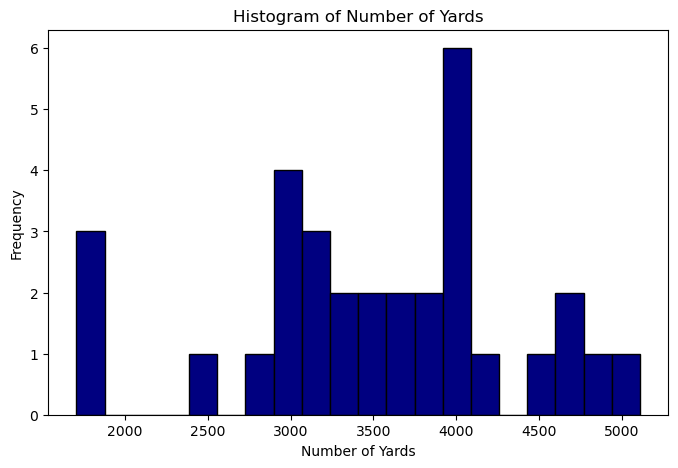

In [19]:
# Create a histogram of the number of yards
plt.figure(figsize=(8, 5))
plt.hist(qb_stats['yds'], bins=20, color='navy', edgecolor='black')
plt.xlabel('Number of Yards')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Yards')
plt.show()

## (d)

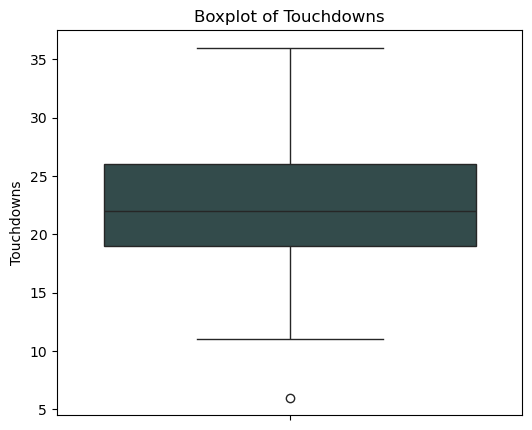

In [24]:
# Create a boxplot of the number of touchdowns and identify outliers
plt.figure(figsize=(6, 5))
sns.boxplot(y=qb_stats['td'], color='darkslategray')
plt.title('Boxplot of Touchdowns')
plt.ylabel('Touchdowns')
plt.show()

In [28]:
# Identify outliers
q1 = qb_stats['td'].quantile(0.25)
q3 = qb_stats['td'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = qb_stats[(qb_stats['td'] < lower_bound) | (qb_stats['td'] > upper_bound)]
print("\nOutliers in touchdowns:")
print(outliers[['name', 'td']])


Outliers in touchdowns:
          name   td
24  Joe Flacco  6.0


# Calculating Probabilities from Data

## (a)

In [32]:
# Load the dataset
survey_data = pd.read_csv(r"C:\Users\Weekseey\Documents\Bellevue Work\Math for Data Science\week10data\survey_data.csv")

# Probability of a college student having brown hair
p_brown_hair = (survey_data['hair_color'] == 'brown').mean()
print(f"Probability of brown hair: {p_brown_hair:.4f}")

Probability of brown hair: 0.5123


## (b)

In [35]:
# Probability of a college student having blue eyes
p_blue_eyes = (survey_data['eye_color'] == 'blue').mean()
print(f"Probability of blue eyes: {p_blue_eyes:.4f}")

Probability of blue eyes: 0.2469


## (c)

In [37]:
# Probability of blue eyes given brown hair
brown_hair_data = survey_data[survey_data['hair_color'] == 'brown']
p_blue_given_brown = (brown_hair_data['eye_color'] == 'blue').mean()
print(f"Probability of blue eyes given brown hair: {p_blue_given_brown:.4f}")

Probability of blue eyes given brown hair: 0.2169


## (d)

In [41]:
# Probability of brown hair given blue eyes
blue_eyes_data = survey_data[survey_data['eye_color'] == 'blue']
p_brown_given_blue = (blue_eyes_data['hair_color'] == 'brown').mean()
print(f"Probability of brown hair given blue eyes: {p_brown_given_blue:.4f}")

Probability of brown hair given blue eyes: 0.4500


## (e)

In [46]:
# Checking independence
independent_check = p_brown_hair * p_blue_eyes
actual_joint_probability = ((survey_data['hair_color'] == 'brown') & (survey_data['eye_color'] == 'blue')).mean()
if abs(independent_check - actual_joint_probability) < 1e-4:
    print("Brown hair and blue eyes are approximately independent.")
else:
    print("Brown hair and blue eyes are NOT independent.")

Brown hair and blue eyes are NOT independent.


If these two probabilities (product of individual probabilities & the actual joint probability) are equal or very close, then the traits are independent, meaning the occurrence of one does not affect the probability of the other.

If they are significantly different, then the traits are not independent, meaning having brown hair changes the likelihood of having blue eyes.

## (f)

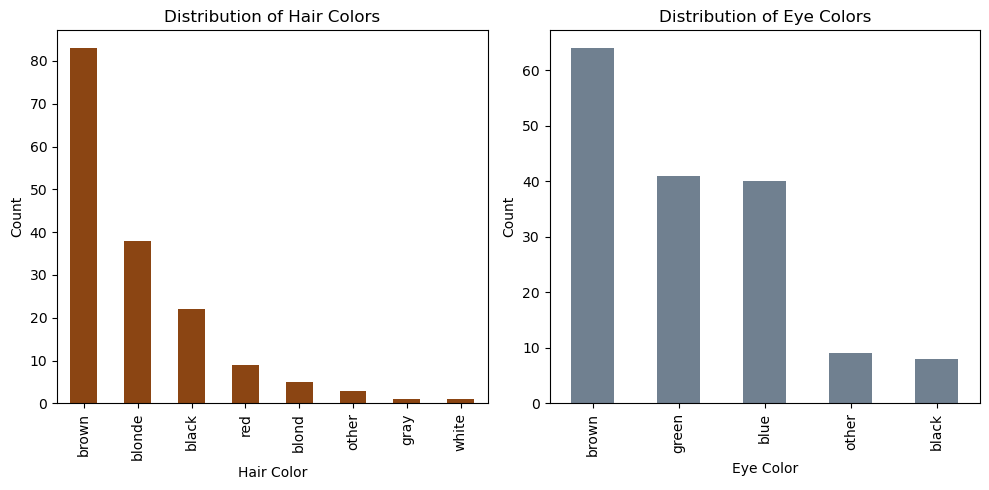

In [54]:
# Create a bar graph of hair color and eye color
plt.figure(figsize=(10,5))

# Hair color distribution
plt.subplot(1,2,1)
survey_data['hair_color'].value_counts().plot(kind='bar', color='saddlebrown')
plt.xlabel('Hair Color')
plt.ylabel('Count')
plt.title('Distribution of Hair Colors')

# Eye color distribution
plt.subplot(1,2,2)
survey_data['eye_color'].value_counts().plot(kind='bar', color='slategray')
plt.xlabel('Eye Color')
plt.ylabel('Count')
plt.title('Distribution of Eye Colors')

plt.tight_layout()
plt.show()

There are some data inconsistencies with hair color FYI. 'blond' instead of 'blonde'.